In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#!pip install chart_studio
from chart_studio.plotly import plot, iplot
from plotly import __version__
print(__version__)

4.8.2


In [3]:
#!pip install cufflinks
import cufflinks as cf
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

In [4]:
df = pd.read_csv(r'C:\Users\tyagir01\Desktop\Data Analytics Problem Set\Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('# of passengers in original data : ' + str(len(df.index)))

# of passengers in original data : 891


In [6]:
import plotly as ply 
#import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
ply.offline.init_notebook_mode(connected=True)

In [7]:
"""plt.figure(figsize=(12,6))
df.iplot(x='Pclass', y='Survived',kind='histogram')"""

"plt.figure(figsize=(12,6))\ndf.iplot(x='Pclass', y='Survived',kind='histogram')"

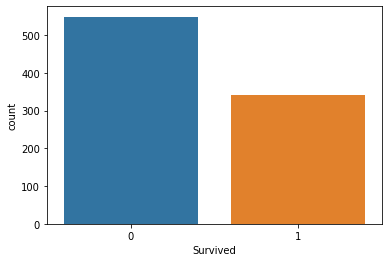

In [8]:
sns.countplot(x="Survived", data=df)

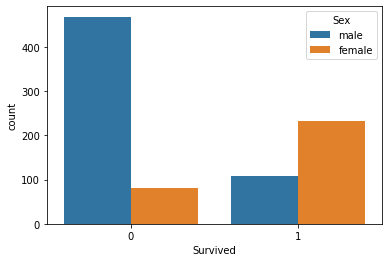

In [9]:
sns.countplot(x="Survived", hue="Sex", data=df)

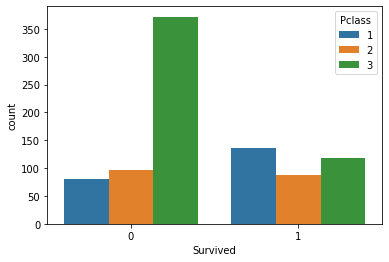

In [10]:
sns.countplot(x="Survived", hue="Pclass", data=df)

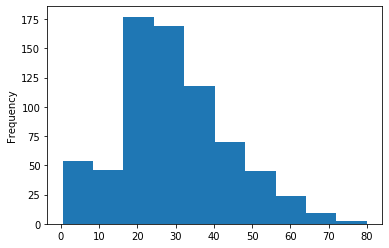

In [11]:
df['Age'].plot.hist()

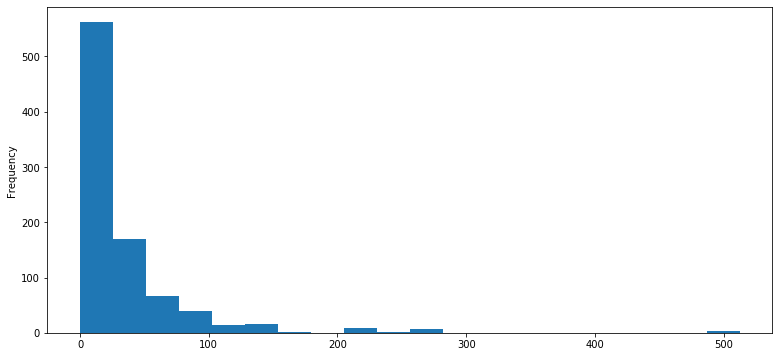

In [12]:
df['Fare'].plot.hist(bins=20, figsize=(13,6))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Wrangling - Cleaning the dataset

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

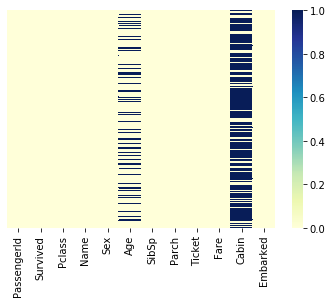

In [16]:
sns.heatmap(df.isnull(), yticklabels=False, cmap = "YlGnBu")

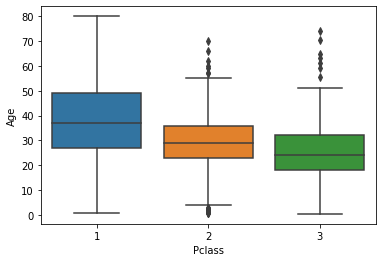

In [17]:
sns.boxplot(x="Pclass", y="Age", data = df)

In [18]:
df.drop("Cabin", axis=1, inplace=True)

In [19]:
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
# Getting dummy variables in place of string values

In [21]:
sex=pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)
pcl = pd.get_dummies(df['Pclass'], drop_first=True)

In [22]:
df = pd.concat([df,sex,embark,pcl], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [23]:
df.drop(["Sex","Embarked","PassengerId","Name","Ticket","Pclass"], axis=1, inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [24]:
print(str(len(df.index)))

712


## Train Data

In [25]:
X = df.drop(['Survived'], axis=1)

In [26]:
y = df['Survived']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=42)

In [28]:
logmodel  = LogisticRegression().fit(X_train,y_train)
logmodel

C:\Users\tyagir01\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
print(X_test.head())

      Age  SibSp  Parch      Fare  male  Q  S  2  3
641  24.0      0      0   69.3000     0  0  0  0  0
496  54.0      1      0   78.2667     0  0  0  0  0
262  52.0      1      1   79.6500     1  0  1  0  0
311  18.0      2      2  262.3750     0  0  0  0  0
551  27.0      0      0   26.0000     1  0  1  1  0


In [30]:
predictions = logmodel.predict(X_test)

In [2]:
#kaggle_test = pd.read_csv(r'C:\Users\tyagir01\Desktop\test.csv')  
#kaggle_test.head()
#kaggle_test. """

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       136
           1       0.74      0.71      0.73        99

    accuracy                           0.77       235
   macro avg       0.77      0.77      0.77       235
weighted avg       0.77      0.77      0.77       235



In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[112  24]
 [ 29  70]]


# Accuracy Check & Test Data

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

77.4468085106383

In [38]:
predictions.size

235